# Prepare the environments for this set of experiments

In [1]:
import sys
sys.path.append('../../')
from panav.environment.env import Room, MultiTunnelEnv, WareHouse
from panav.viz import draw_env,draw_hybrid
from panav.hybrid import HybridGraph

from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

In [2]:
def get_env_name(filename):
    fs = filename.split('.')
    return fs[0]

In [67]:
from panav.sequential import sequential_HybridSIPP, sequential_planning
from panav.SAMP.solvers import Tube_Planning
from benchmarks.ST_RRTStar_wrapper import sequential_ST_RRTStar 
from os import listdir

bloating_r = 0.5
vmax = 1.0

TIMEOUT = 200

# Specify the Algorithms
algs = {  
        "Seq_Tube": lambda HG: sequential_planning(Tube_Planning,HG.env,vmax,bloating_r,TIMEOUT=TIMEOUT),   
        }
# Load environment presets
env_names = [get_env_name(fn) for fn in listdir('./envs')]

env_info = {}

for name in env_names:
    with open(f'./envs/{name}.pkl','rb') as fp:
        env_info[name] = pkl.load(fp)

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for ompl::msg::LogLevel already registered; second conversion method ignored.


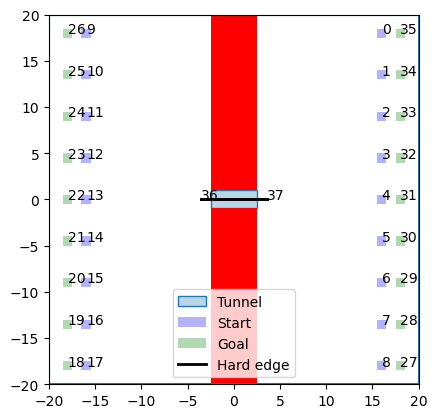

In [7]:
# Single Tunnel
from panav.hybrid import MultiTunnelHG

bloating_r = 0.5

limits = [(-20,20),(-20,20)]
n_tunnel = 1

specs = dict(n_tunnel = n_tunnel, 
            tunnel_width = bloating_r*3.9,
            limits=limits,
            wallthickness = 5.0,
            bloating_r = bloating_r)

HG = MultiTunnelHG(**specs, 
                   N_agent=18)
draw_hybrid(HG,
            display_node=True)

In [8]:
from panav.sequential import sequential_planning
from panav.SAMP.solvers import Tube_Planning
MILP_plan = sequential_planning(Tube_Planning,HG.env,vmax=1.0,bloating_r=bloating_r)

Planning for agent 0/18
Planning for agent 1/18
Planning for agent 2/18
Planning for agent 3/18


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


Planning for agent 4/18
Planning for agent 5/18
Planning for agent 6/18
Planning for agent 7/18
Planning for agent 8/18
Planning for agent 9/18
Planning for agent 10/18
Planning for agent 11/18
Planning for agent 12/18
Planning for agent 13/18
Planning for agent 14/18
Planning for agent 15/18
Planning for agent 16/18
Planning for agent 17/18


In [15]:
from matplotlib import pyplot as plt
from panav.viz import animation
from IPython.display import HTML, display
from matplotlib import rcParams
from panav.util import interpolate_positions

plans = MILP_plan
exec_tau = 0.25

rcParams['animation.embed_limit'] = 2**128
dt = 0.05
agents = range(len(plans))
pos_to_ani = []

for cp in plans:
    _,xs = interpolate_positions(*cp,exec_tau)
    pos_to_ani.append(xs)
dt = 0.02
anim = animation(HG.env, pos_to_ani, bloating_r, dt = dt,displayAgentID=False,no_legend=True)
# display(HTML(anim.to_jshtml()))
anim.save('simFigures/SingleTunnel.mp4')
plt.close() 

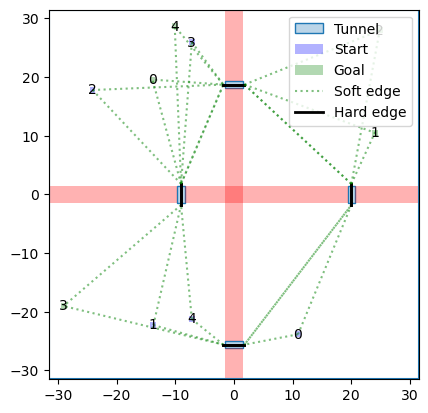

In [60]:
from matplotlib import pyplot as plt
from panav.hybrid import RoomHGBuilder
# Room Simplified


n_agents = list(range(1,41,10))
bloating_r = 0.5

specs = dict(n_col = 2, 
        n_row= 2, 
        cell_width= 30,
        cell_height= 30,
        gap_width= 2.5*bloating_r,
        wallthickness = 3.0,
        start_goal_dist= 50,
        bloating_r = bloating_r)


HG = RoomHGBuilder(**specs, N_agent=5)
draw_hybrid(HG,display_soft=True,show_agent_ID=True,display_node=False)

In [59]:
from panav.SAMP.solvers import Tube_Planning
from panav.sequential import sequential_planning
vmax = 1.0
plans = sequential_planning(Tube_Planning, HG.env,vmax,bloating_r,TIMEOUT=100)

Planning for agent 0/20
Planning for agent 1/20
Planning for agent 2/20
Planning for agent 3/20
Planning for agent 4/20
Planning for agent 5/20
Planning for agent 6/20
Planning for agent 7/20
Planning for agent 8/20
Planning for agent 9/20
Planning for agent 10/20
Planning for agent 11/20
Planning for agent 12/20
Planning for agent 13/20
Planning for agent 14/20
Planning for agent 15/20
Planning for agent 16/20
Planning for agent 17/20
Planning for agent 18/20
Planning for agent 19/20
